###The Sparks Foundation - GRIP - Data Science and Business Analytics(April'22)




###Prediction using unsupervised  machine learning 

Task- 2: K- Means Clustering
This notebook will walk through some of the basics of K-Means Clustering.

Prediction using Unsupervised Machine Learning (#machinelearning) on 'Iris' dataset as a part of my ' Data Science and Business Analytics Internship' during Graduate Rotational Program (#gripapril22 ) at The Sparks Foundation.

Dataset : iris dataset (Scikit-learn) -
https://bit.ly/3kXTdox

Problem Statement :
> Predict the optimum no. of clusters and represent them visually.

Author: Imen Selmi

## Importing the libraries

In [35]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from math import pi 
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder 
from sklearn.cluster import KMeans

%matplotlib inline
from sklearn import datasets
import seaborn as sns

# Load the iris dataset

In [36]:
iris = datasets.load_iris()
data = pd.DataFrame(iris.data, columns = iris.feature_names)
data.head() # See the first 5 rows

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [37]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [38]:
data.shape

(150, 4)

In [39]:
data.describe() #Gives us all the neccesary statistics

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [40]:
#Check for duplicate values
print('No. of duplicated values :', data.duplicated().sum())

No. of duplicated values : 1


In [41]:
data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [42]:
data.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
dtype: int64

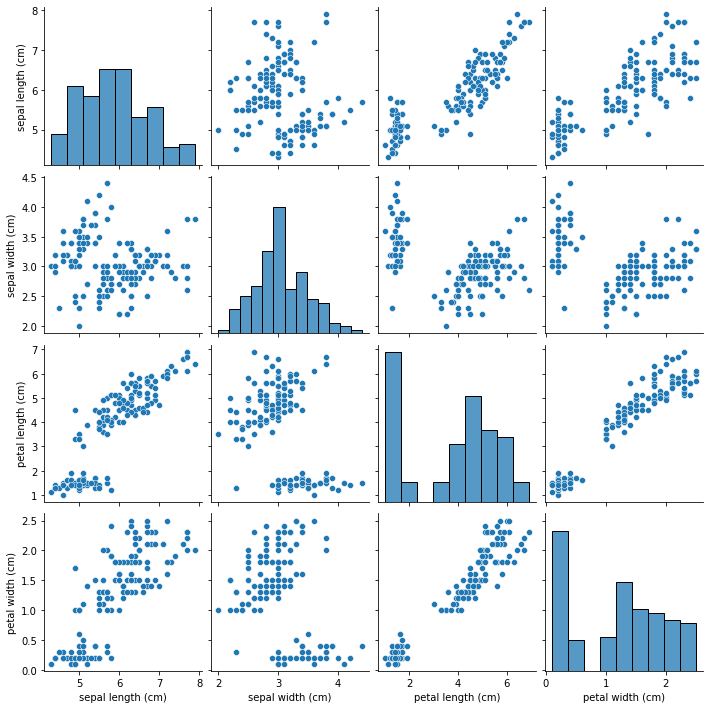

In [43]:
sns.pairplot(data)

#Correaltion Matrix

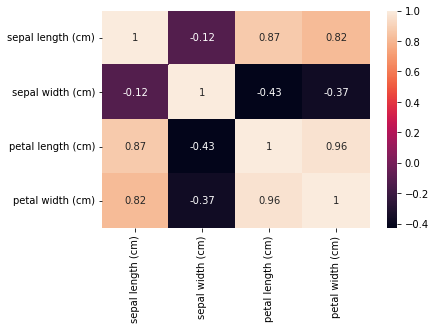

In [44]:
corr = data.corr()
sns.heatmap(corr,annot=True)

# Finding the optimum number of clusters for k-means classification

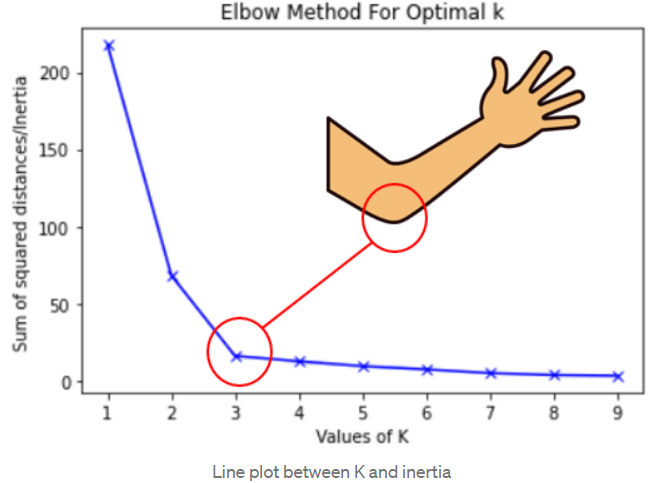

In [45]:
#Calculating the sum of squares in-cluster
within_cluster_sum_of_squares = []

cluster_range = range(1,15)
for k in cluster_range:
    km = KMeans(n_clusters=k)
    km = km.fit(data.iloc[:,[0,1,2,3]])
    within_cluster_sum_of_squares.append(km.inertia_)


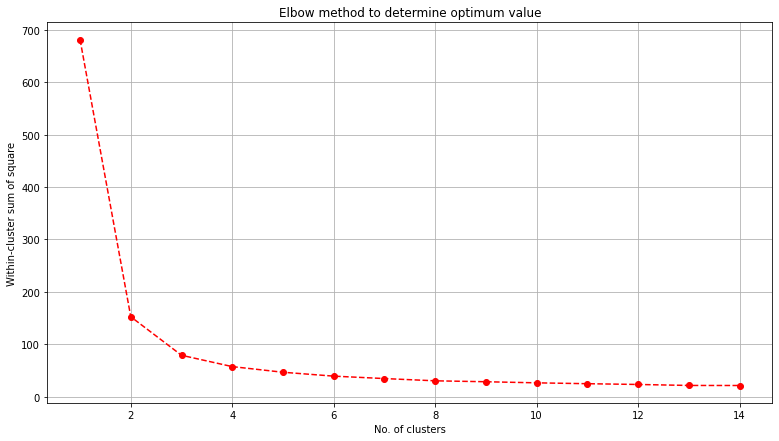

In [46]:
#Plotting the cluster range
plt.figure(figsize=(13,7))
plt.plot(cluster_range,within_cluster_sum_of_squares,'ro--',color='red')
plt.title('Elbow method to determine optimum value')
plt.xlabel('No. of clusters')
plt.ylabel('Within-cluster sum of square')
plt.grid()
plt.show()

You can clearly see why it is called 'The elbow method' from the above graph, the optimum clusters is where the elbow occurs. This is when the within cluster sum of squares (WCSS) doesn't decrease significantly with every iteration.

From this we choose the number of clusters as ** '3**'.

# Applying kmeans to the dataset / Creating the kmeans classifier

In [47]:
model = KMeans(n_clusters=3,init='k-means++',max_iter=300,n_init=10,random_state=0)
prediction = model.fit_predict(data.iloc[:,[0,1,2,3]])

# Visualising the clusters - On the first two columns

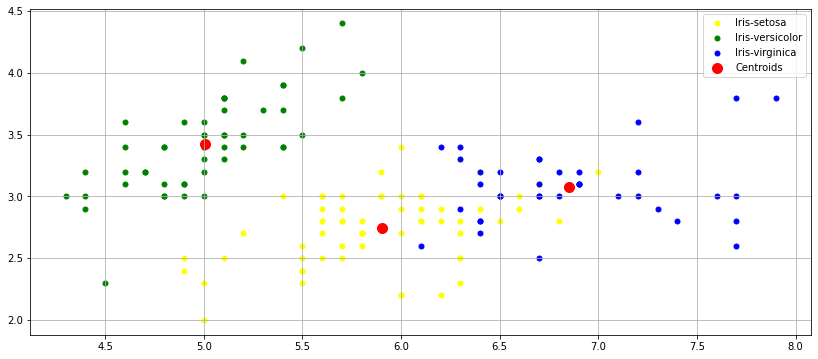

In [48]:
#Visualize
plt.figure(figsize=(14,6))
val = data.iloc[:,[0,1,2,3]].values
plt.scatter(val[prediction == 0,0],val[prediction == 0,1],s=25,c='yellow',label='Iris-setosa')
plt.scatter(val[prediction == 1,0],val[prediction == 1,1],s=25,c='green',label='Iris-versicolor')
plt.scatter(val[prediction == 2,0],val[prediction == 2,1],s=25,c='blue',label='Iris-virginica')

#Plot cluster centers
plt.scatter(model.cluster_centers_[:,0],model.cluster_centers_[:,1],s=100,c='red',label='Centroids')
plt.grid()
plt.legend()

##thank you 😍